# Make locus-gene plot for significant PP4 results
- protein_coding genes only

In [1]:
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ─────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
res <- read.table("../out/coloc_rosmap_scz.tsv",header=T)

In [3]:
head(res)

V1                                                loc ensg            rosmap
1 locus100/ENSG00000137822.rosmap.Ast.coloc.res.rds 100 ENSG00000137822 rosmap
2 locus100/ENSG00000137822.rosmap.Exc.coloc.res.rds 100 ENSG00000137822 rosmap
3 locus100/ENSG00000137822.rosmap.Inh.coloc.res.rds 100 ENSG00000137822 rosmap
4 locus100/ENSG00000140259.rosmap.Exc.coloc.res.rds 100 ENSG00000140259 rosmap
5 locus100/ENSG00000140265.rosmap.Ast.coloc.res.rds 100 ENSG00000140265 rosmap
6 locus100/ENSG00000166762.rosmap.Inh.coloc.res.rds 100 ENSG00000166762 rosmap
  type PP4       SNP       CHR BP       P         V11            V12     
1 Ast  0.9394188 rs2929278 15  44250313 6.006e-11 protein_coding TUBGCP4 
2 Exc  0.8812431 rs2929278 15  44250313 6.006e-11 protein_coding TUBGCP4 
3 Inh  0.9433977 rs2929278 15  44250313 6.006e-11 protein_coding TUBGCP4 
4 Exc  0.7916155 rs2929278 15  44250313 6.006e-11 protein_coding MFAP1   
5 Ast  0.9486488 rs2929278 15  44250313 6.006e-11 protein_coding ZSCAN29 
6 Inh  0.8395914 rs2929278 15  44250313 6.006e-11 protein_coding CATSPER2

In [4]:
res_plot <- res %>% 
    filter(V11 == "protein_coding") %>% 
    arrange(loc, V12, type, -PP4)
# res_plot$loc <- paste0(res_plot$CHR, ":", res_plot$BP)
remove <- which(duplicated(res_plot[c("loc", "V12", "type")]))
remove

integer(0)

In [6]:
table(res$type)


Ast Exc Inh Mic Oli OPC 
 40  82  61   4  31  14 

In [13]:
res%>%filter(V12=='FURIN')

V1                                              loc ensg            rosmap
1 locus4/ENSG00000140564.rosmap.Exc.coloc.res.rds 4   ENSG00000140564 rosmap
  type PP4       SNP    CHR BP       P         V11            V12  
1 Exc  0.9999981 rs4702 15  91426560 1.757e-23 protein_coding FURIN

In [20]:
length(unique(res$loc))
res %>% filter(PP4>0.8) %>% select(loc) %>% unique()

[1] 101

loc
1   100
7   102
8   103
11  106
13  109
14  111
20  112
26  114
27  115
28  116
34  119
37  120
47  121
48  124
49  129
51  133
53  139
57  142
58  146
64  149
65  159
66  160
67  165
68  171
70  172
72  173
73  176
75  179
77  180
78  181
... ...
133 264
135 268
137 269
142 277
144  27
145 280
146 289
147  43
148  45
153  48
154  49
155   4
156  51
160  55
161  59
167   5
168  61
171  63
172  69
173   6
174  71
176  75
178  76
179  77
181  78
185  81
186  83
187  89
188  93
189  95

In [19]:
res %>% filter(PP4>0.8)

V1                                                loc ensg           
1   locus100/ENSG00000137822.rosmap.Ast.coloc.res.rds 100 ENSG00000137822
2   locus100/ENSG00000137822.rosmap.Exc.coloc.res.rds 100 ENSG00000137822
3   locus100/ENSG00000137822.rosmap.Inh.coloc.res.rds 100 ENSG00000137822
4   locus100/ENSG00000140265.rosmap.Ast.coloc.res.rds 100 ENSG00000140265
5   locus100/ENSG00000166762.rosmap.Inh.coloc.res.rds 100 ENSG00000166762
6   locus100/ENSG00000242866.rosmap.Inh.coloc.res.rds 100 ENSG00000242866
7   locus102/ENSG00000188641.rosmap.Ast.coloc.res.rds 102 ENSG00000188641
8   locus103/ENSG00000172817.rosmap.Ast.coloc.res.rds 103 ENSG00000172817
9   locus103/ENSG00000172817.rosmap.Exc.coloc.res.rds 103 ENSG00000172817
10  locus103/ENSG00000172817.rosmap.Inh.coloc.res.rds 103 ENSG00000172817
11  locus106/ENSG00000182774.rosmap.Exc.coloc.res.rds 106 ENSG00000182774
12  locus106/ENSG00000259462.rosmap.Oli.coloc.res.rds 106 ENSG00000259462
13  locus109/ENSG00000127152.rosmap.OPC.coloc.res.rds 109 ENSG00000127152
14  locus111/ENSG00000073969.rosmap.Exc.coloc.res.rds 111 ENSG00000073969
15  locus111/ENSG00000176681.rosmap.Exc.coloc.res.rds 111 ENSG00000176681
16  locus111/ENSG00000176681.rosmap.Inh.coloc.res.rds 111 ENSG00000176681
17  locus111/ENSG00000238083.rosmap.Exc.coloc.res.rds 111 ENSG00000238083
18  locus111/ENSG00000238083.rosmap.Inh.coloc.res.rds 111 ENSG00000238083
19  locus111/ENSG00000262879.rosmap.Exc.coloc.res.rds 111 ENSG00000262879
20  locus112/ENSG00000085788.rosmap.Ast.coloc.res.rds 112 ENSG00000085788
21  locus112/ENSG00000085788.rosmap.Exc.coloc.res.rds 112 ENSG00000085788
22  locus112/ENSG00000085788.rosmap.Oli.coloc.res.rds 112 ENSG00000085788
23  locus112/ENSG00000147535.rosmap.Ast.coloc.res.rds 112 ENSG00000147535
24  locus112/ENSG00000147535.rosmap.Exc.coloc.res.rds 112 ENSG00000147535
25  locus112/ENSG00000147535.rosmap.Inh.coloc.res.rds 112 ENSG00000147535
26  locus114/ENSG00000140525.rosmap.Ast.coloc.res.rds 114 ENSG00000140525
27  locus115/ENSG00000036257.rosmap.Ast.coloc.res.rds 115 ENSG00000036257
28  locus116/ENSG00000226124.rosmap.Ast.coloc.res.rds 116 ENSG00000226124
29  locus116/ENSG00000226124.rosmap.Exc.coloc.res.rds 116 ENSG00000226124
30  locus116/ENSG00000226124.rosmap.Inh.coloc.res.rds 116 ENSG00000226124
... ...                                               ... ...            
162 locus59/ENSG00000226124.rosmap.Exc.coloc.res.rds  59  ENSG00000226124
163 locus59/ENSG00000226124.rosmap.Inh.coloc.res.rds  59  ENSG00000226124
164 locus59/ENSG00000226124.rosmap.Oli.coloc.res.rds  59  ENSG00000226124
165 locus59/ENSG00000238217.rosmap.Exc.coloc.res.rds  59  ENSG00000238217
166 locus59/ENSG00000238217.rosmap.Inh.coloc.res.rds  59  ENSG00000238217
167 locus5/ENSG00000114902.rosmap.Inh.coloc.res.rds    5  ENSG00000114902
168 locus61/ENSG00000126456.rosmap.Ast.coloc.res.rds  61  ENSG00000126456
169 locus61/ENSG00000126456.rosmap.Exc.coloc.res.rds  61  ENSG00000126456
170 locus61/ENSG00000126456.rosmap.Inh.coloc.res.rds  61  ENSG00000126456
171 locus63/ENSG00000054282.rosmap.OPC.coloc.res.rds  63  ENSG00000054282
172 locus69/ENSG00000149527.rosmap.Oli.coloc.res.rds  69  ENSG00000149527
173 locus6/ENSG00000151067.rosmap.Inh.coloc.res.rds    6  ENSG00000151067
174 locus71/ENSG00000115816.rosmap.Oli.coloc.res.rds  71  ENSG00000115816
175 locus71/ENSG00000115825.rosmap.Mic.coloc.res.rds  71  ENSG00000115825
176 locus75/ENSG00000072134.rosmap.Ast.coloc.res.rds  75  ENSG00000072134
177 locus75/ENSG00000108641.rosmap.Exc.coloc.res.rds  75  ENSG00000108641
178 locus76/ENSG00000102471.rosmap.Exc.coloc.res.rds  76  ENSG00000102471
179 locus77/ENSG00000267028.rosmap.Exc.coloc.res.rds  77  ENSG00000267028
180 locus77/ENSG00000267028.rosmap.Inh.coloc.res.rds  77  ENSG00000267028
181 locus78/ENSG00000183066.rosmap.Ast.coloc.res.rds  78  ENSG00000183066
182 locus78/ENSG00000183066.rosmap.Exc.coloc.res.rds  78  ENSG00000183066
183 locus78/ENSG00000183066.rosmap.Inh.coloc.res.rds  78  ENSG00000183066
184 locu

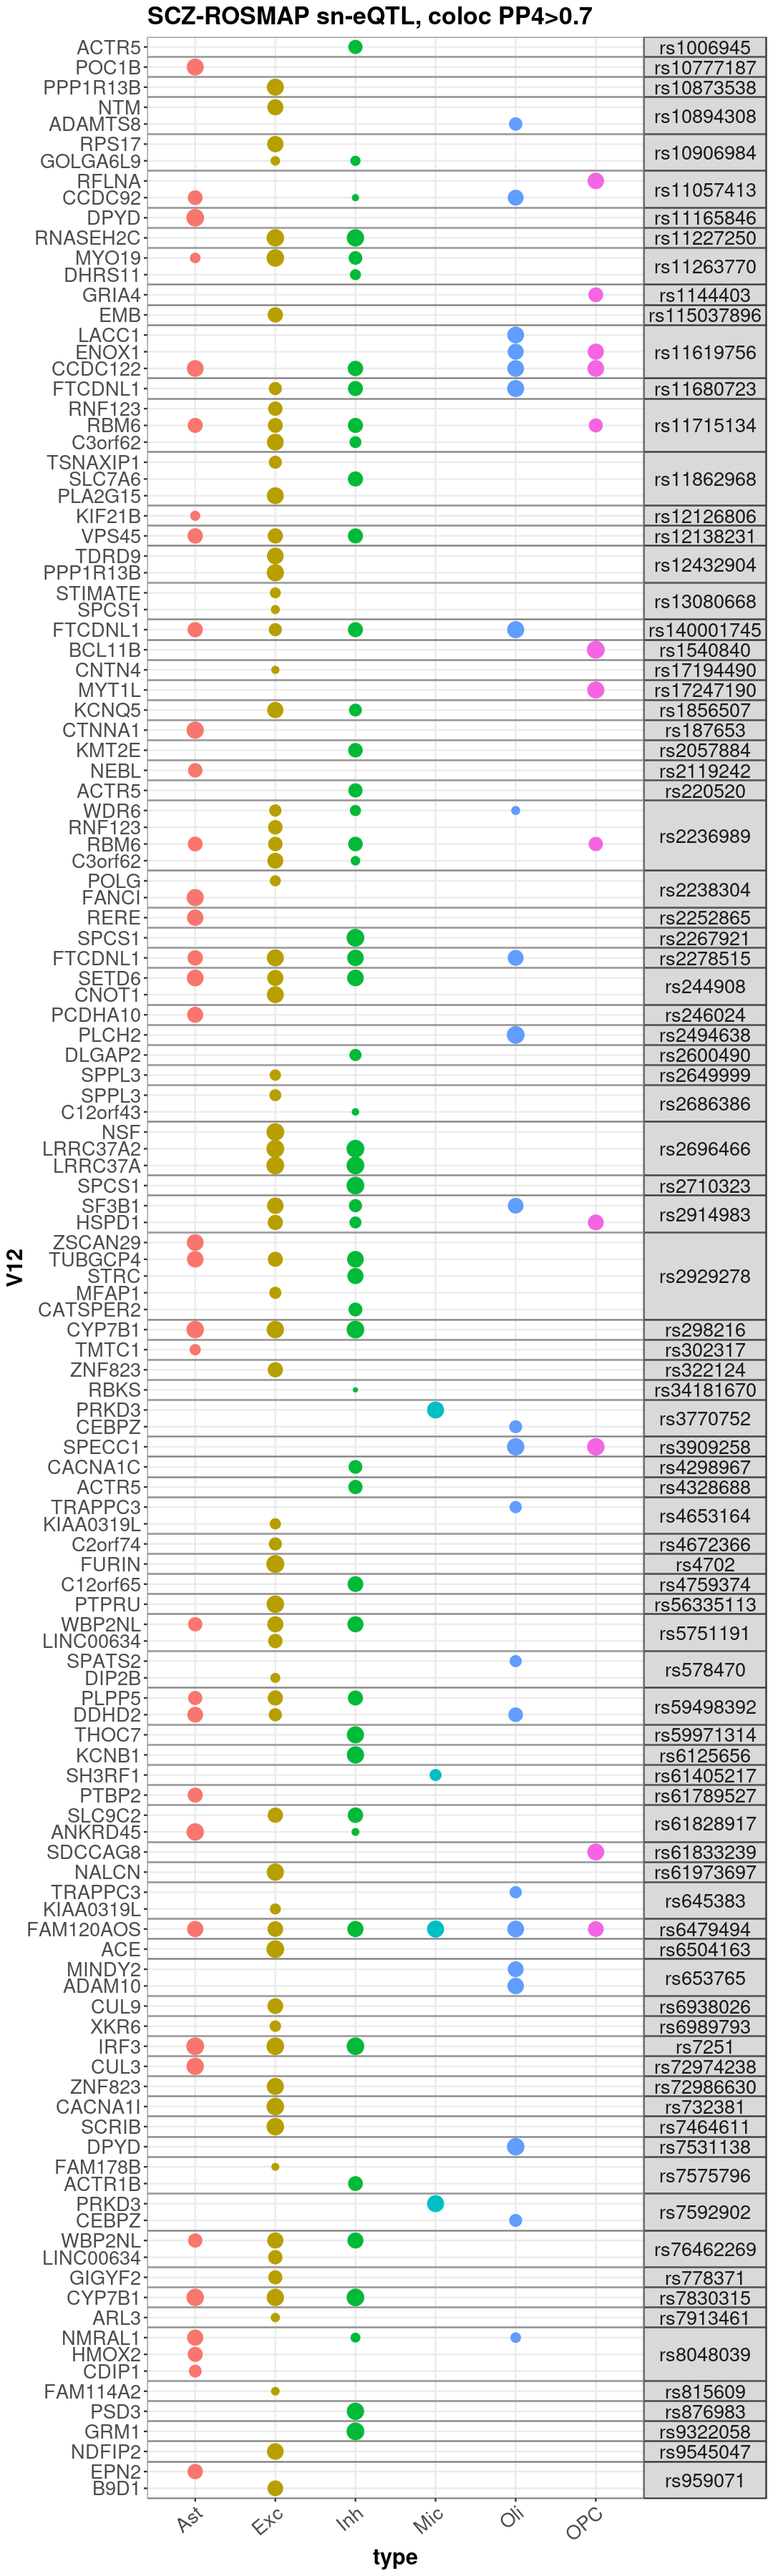

In [8]:

# res_plot <- res_plot[-remove,]
options(repr.plot.height = 30, repr.plot.width = 9)

ggplot(res_plot, aes(x = type, y = V12)) +
    geom_point(aes(size = PP4, color = type)) +
#     geom_text(aes(label = round(PP4, 2)), size = 5, vjust = 2) +
    facet_grid(SNP ~ ., scales = "free", space = "free") +
    theme_bw() +
    ggtitle("SCZ-ROSMAP sn-eQTL, coloc PP4>0.7") +
    theme(axis.text = element_text(size = 16),
          axis.text.x = element_text(angle = 40, hjust = 1),
          axis.title = element_text(size = 18, face = "bold"),
          plot.title = element_text(size = 20, face = "bold"),
          legend.position = "none",
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA))

In [23]:
setwd("/u/project/gandalm/cindywen/GWAS-coloc/code/")

In [9]:
mdd <- read.table("../out/MDD.Howard.PGC.2019/coloc_sigPP4_annot.txt", header = T)
scz <- read.table("../out/PGC3_SCZ_wave3.european.autosome.public.v3/coloc_sigPP4_annot.txt", header = T)
bip <- read.table("../out/pgc-bip2021-all/coloc_sigPP4_annot.txt", header = T)
asd <- read.table("../out/ASD.iPSYCHPGC.2018/coloc_sigPP4_annot.txt", header = T)
adhd <- read.table("../out/ADHD.Demontis.2019/coloc_sigPP4_annot.txt", header = T)

In [10]:
scz <- scz %>% select(-SNP, -P)

In [11]:
bip <- bip %>% select(-SNP, -P)

In [12]:
dat <- rbind(scz, bip, adhd, mdd, asd)
# dat <- dat %>% select(-loc)

In [13]:
write.table(dat, "../out/coloc.tsv", col.names = T, row.names = F, sep = "\t", quote = F)

In [14]:
my_palette <- c(
  "fetal_eqtl" = "#E41A1C",
  "fetal_isoqtl" = "#377EB8",
  "fetal_sqtl" = "#4DAF4A",
  "fetal_tri1_eqtl" = "#984EA3",
  "fetal_tri1_isoqtl" = "#FF7F00",
  "fetal_tri1_sqtl" = "#FFFF33",
  "fetal_tri2_eqtl" = "#A65628",
  "fetal_tri2_isoqtl" = "#F781BF",
  "fetal_tri2_sqtl" = "#999999",
  "MetaBrain_eqtl" = "#66C2A5",
  "thistle_sqtl" = "#FB9A99"
)

# # Plot the colors
# plot(1:11, type = "n", axes = FALSE, xlab = "", ylab = "", xlim = c(0, 12), ylim = c(0, 1))
# rect(1:11, 0, 2:12, 1, col = my_palette, border = NA)

### MDD

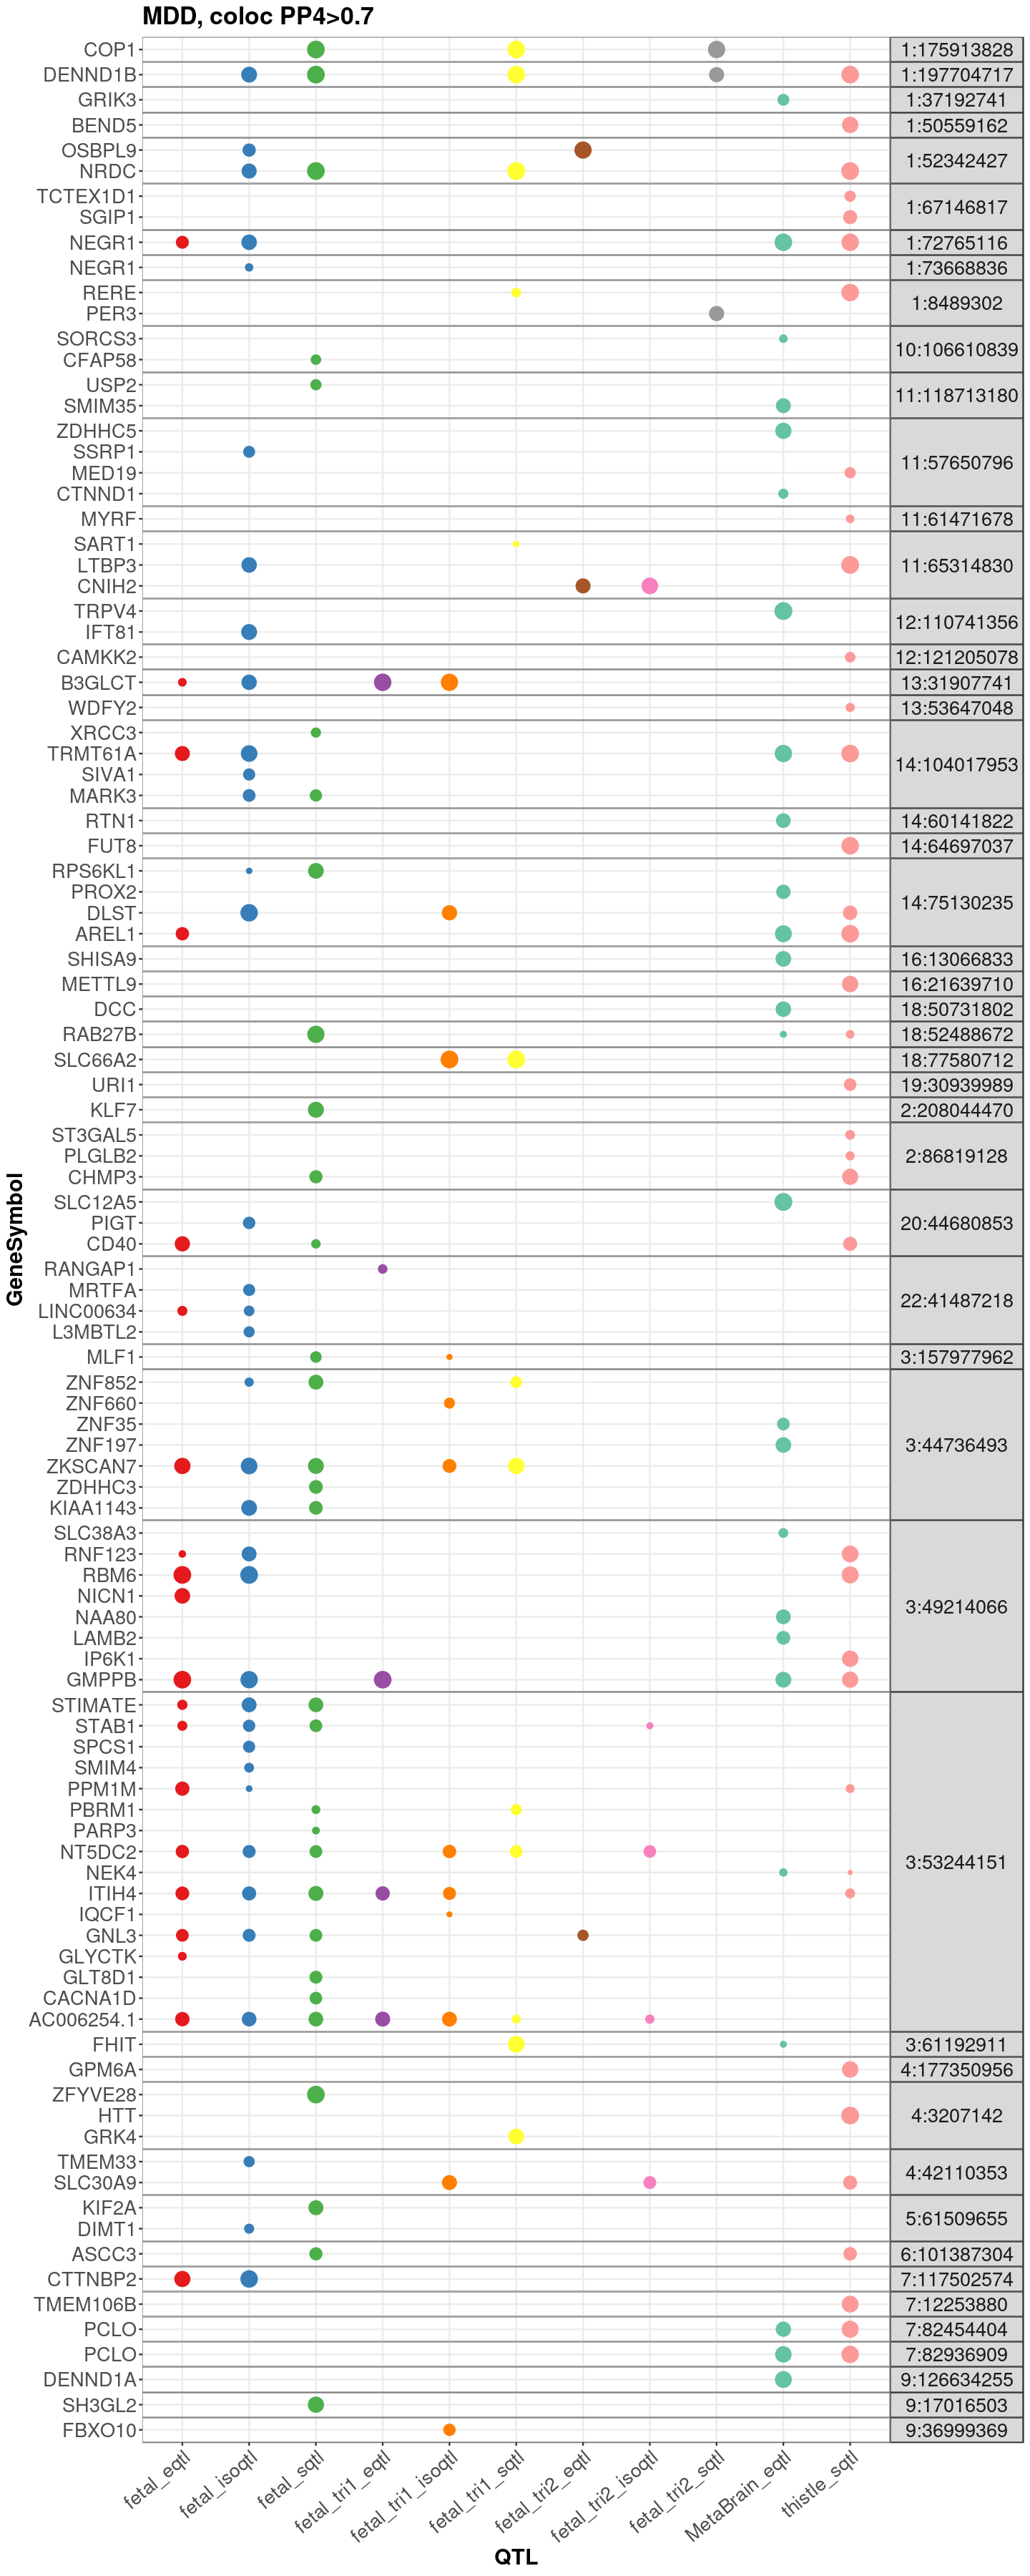

In [16]:
res <- dat %>% filter(GWAS == 'MDD.Howard.PGC.2019')
# res <- read.table("../out/MDD.Howard.PGC.2019/coloc_sigPP4_annot.txt", header = T)
res_plot <- res %>% 
    filter(GeneType == "protein_coding") %>% 
    arrange(loc, GeneSymbol, QTL, -PP4)
res_plot$loc <- paste0(res_plot$CHR, ":", res_plot$BP)
remove <- which(duplicated(res_plot[c("loc", "GeneSymbol", "QTL")]))
res_plot <- res_plot[-remove,]
options(repr.plot.height = 30, repr.plot.width = 12)

ggplot(res_plot, aes(x = QTL, y = GeneSymbol)) +
    geom_point(aes(size = PP4, color = QTL)) +
#     geom_text(aes(label = round(PP4, 2)), size = 5, vjust = 2) +
    facet_grid(loc ~ ., scales = "free", space = "free") +
    theme_bw() +
    ggtitle("MDD, coloc PP4>0.7") +
    theme(axis.text = element_text(size = 16),
          axis.text.x = element_text(angle = 40, hjust = 1),
          axis.title = element_text(size = 18, face = "bold"),
          plot.title = element_text(size = 20, face = "bold"),
          legend.position = "none",
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_color_manual(values = my_palette)

In [91]:
ggsave("../figures/coloc_mdd.pdf", height = 30, width = 12, limitsize = FALSE)

### SCZ

In [18]:
# res <- dat %>% filter(GWAS == 'PGC3_SCZ_wave3.european.autosome.public.v3')
res <- read.table("../out/PGC3_SCZ_wave3.european.autosome.public.v3/coloc_sigPP4_annot.txt", header = T)
# head(res)

In [19]:
res_plot <- res %>% 
    filter(GeneType == "protein_coding") %>% 
    arrange(P, GeneSymbol, QTL, -PP4)
res_plot$loc <- paste0(res_plot$SNP, "_", res_plot$CHR, ":", res_plot$BP, ", ", res_plot$P)

In [20]:
res_plot$loc <- factor(res_plot$loc, levels = unique(res_plot$loc))

In [21]:
remove <- which(duplicated(res_plot[c("loc", "GeneSymbol", "QTL")]))
res_plot <- res_plot[-remove,]
# head(res_plot)

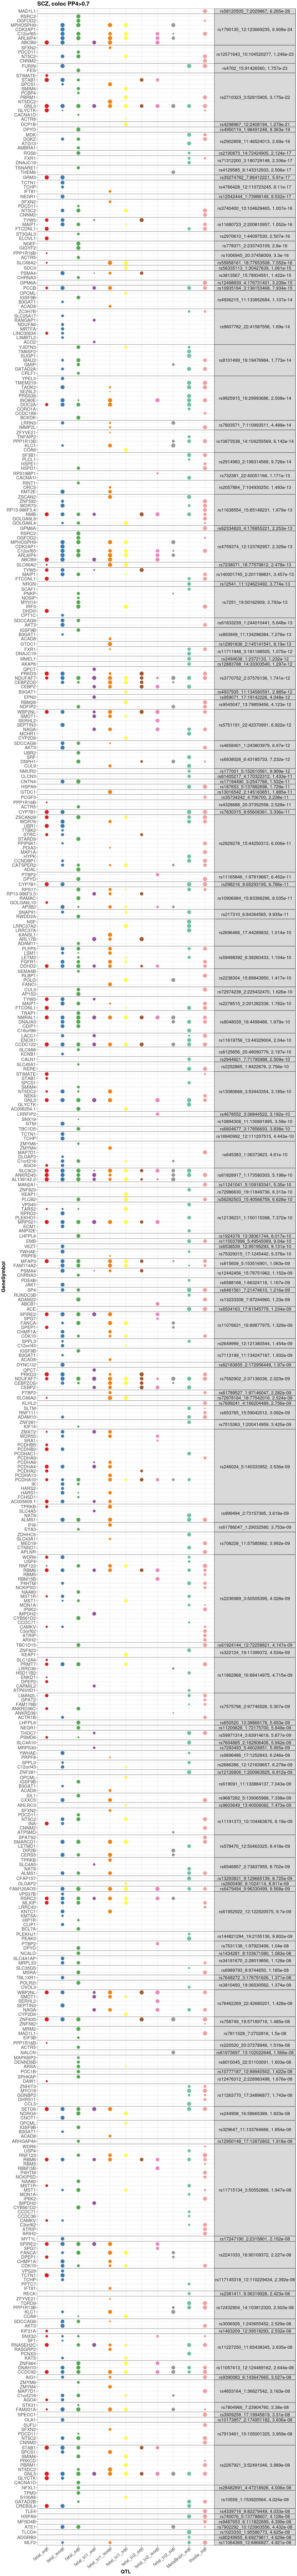

In [22]:
options(repr.plot.height = 130, repr.plot.width = 15)

ggplot(res_plot, aes(x = QTL, y = GeneSymbol)) +
    geom_point(aes(size = PP4, color = QTL)) +
#     geom_text(aes(label = round(PP4, 2)), size = 5, vjust = 2) +
    facet_grid(loc ~ ., scales = "free", space = "free") +
    theme_bw() +
    ggtitle("SCZ, coloc PP4>0.7") +
    theme(axis.text = element_text(size = 16),
          axis.text.x = element_text(angle = 40, hjust = 1),
          axis.title = element_text(size = 18, face = "bold"),
          plot.title = element_text(size = 20, face = "bold"),
          legend.position = "none",
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_color_manual(values = my_palette)

In [89]:
ggsave("../figures/coloc_scz.pdf", height = 130, width = 15, limitsize = FALSE)

### BIP

In [65]:
res <- read.table("../out/pgc-bip2021-all/coloc_sigPP4_annot.txt", header = T)

In [42]:
head(res$P)

[1] "4.5 × 10−8" "1.6 × 10−9" "1.6 × 10−9" "1.9 × 10−9" "1.9 × 10−9"
[6] "1.7 × 10−8"

In [66]:
temp <- gsub(' × 10−', 'e-', res$P)
head(temp)

[1] "4.5e-8" "1.6e-9" "1.6e-9" "1.9e-9" "1.9e-9" "1.7e-8"

In [67]:
res$P <- as.numeric(temp)

In [68]:
res_plot <- res %>% 
    filter(GeneType == "protein_coding") %>% 
    arrange(P, GeneSymbol, QTL, -PP4)
res_plot$loc <- paste0(res_plot$SNP, "_", res_plot$CHR, ":", res_plot$BP, ", ", res_plot$P)
# head(res_plot)

In [69]:
res_plot$loc <- factor(res_plot$loc, levels = unique(res_plot$loc))

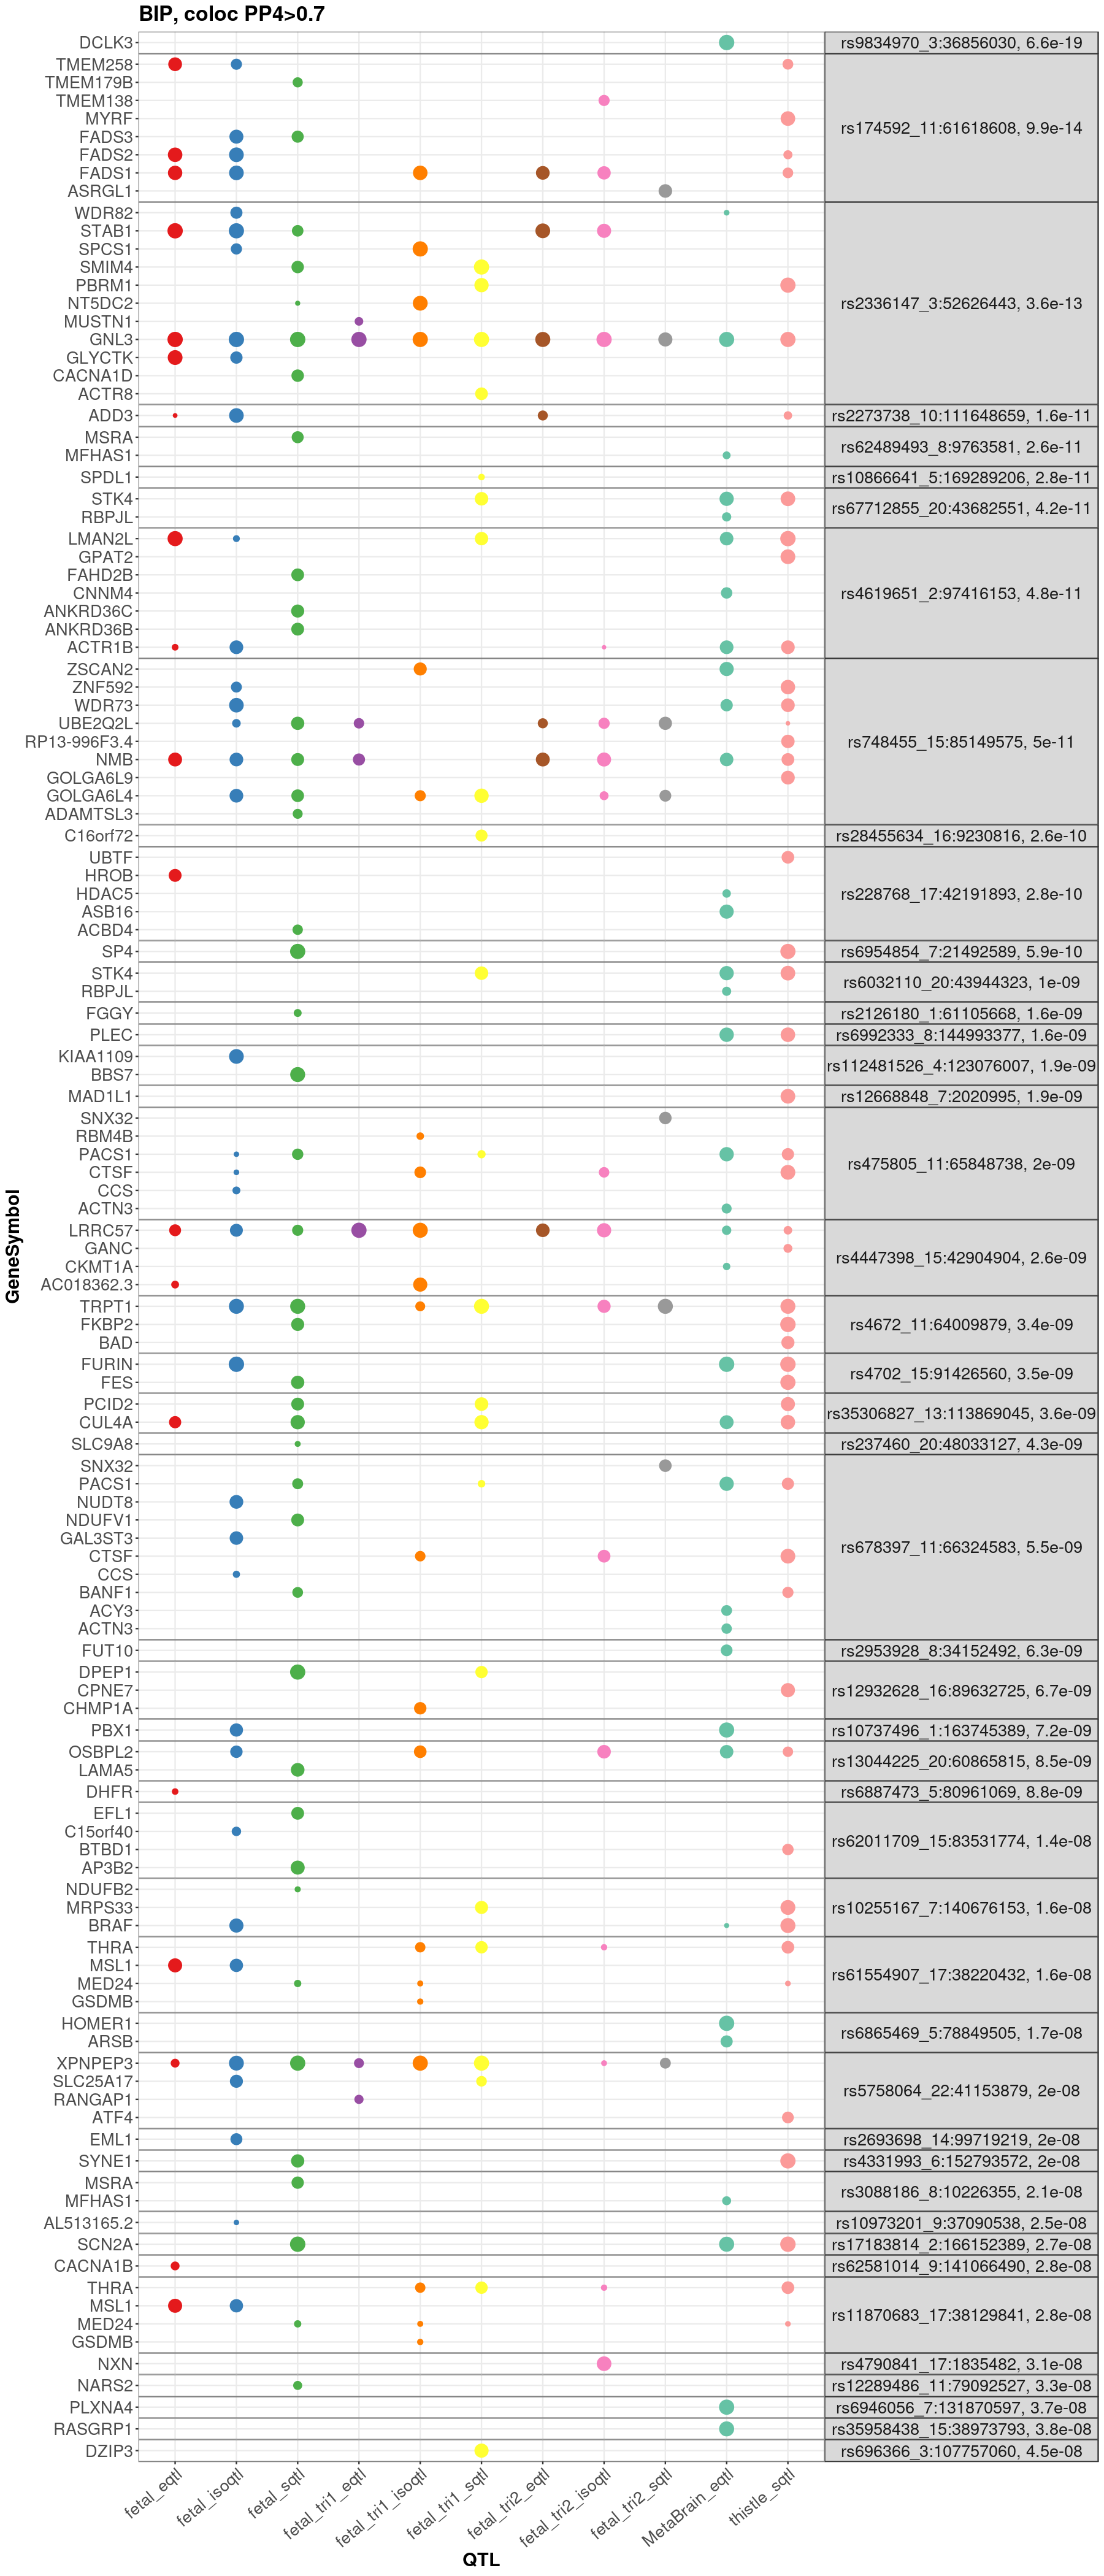

In [70]:
remove <- which(duplicated(res_plot[c("loc", "GeneSymbol", "QTL")]))
res_plot <- res_plot[-remove,]
options(repr.plot.height = 35, repr.plot.width = 15)

ggplot(res_plot, aes(x = QTL, y = GeneSymbol)) +
    geom_point(aes(size = PP4, color = QTL)) +
#     geom_text(aes(label = round(PP4, 2)), size = 5, vjust = 2) +
    facet_grid(loc ~ ., scales = "free", space = "free") +
    theme_bw() +
    ggtitle("BIP, coloc PP4>0.7") +
    theme(axis.text = element_text(size = 16),
          axis.text.x = element_text(angle = 40, hjust = 1),
          axis.title = element_text(size = 18, face = "bold"),
          plot.title = element_text(size = 20, face = "bold"),
          legend.position = "none",
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_color_manual(values = my_palette)

In [71]:
ggsave("../figures/coloc_bip.pdf", height = 25, width = 15)

### ASD

In [92]:
res <- read.table("../out/ASD.iPSYCHPGC.2018/coloc_sigPP4_annot.txt", header = T)
# head(res)

In [93]:
res_plot <- res %>% 
    filter(GeneType == "protein_coding") %>% 
    arrange(loc, GeneSymbol, QTL, -PP4)

In [94]:
res_plot$loc <- paste0("locus ", res_plot$CHR, ":", res_plot$BP)

In [6]:
# remove <- which(duplicated(coloc_ADHD_AUT_CC[c("Locus", "Gene", "xQTL")]))
# coloc_ADHD_AUT_CC <- coloc_ADHD_AUT_CC[-remove,]

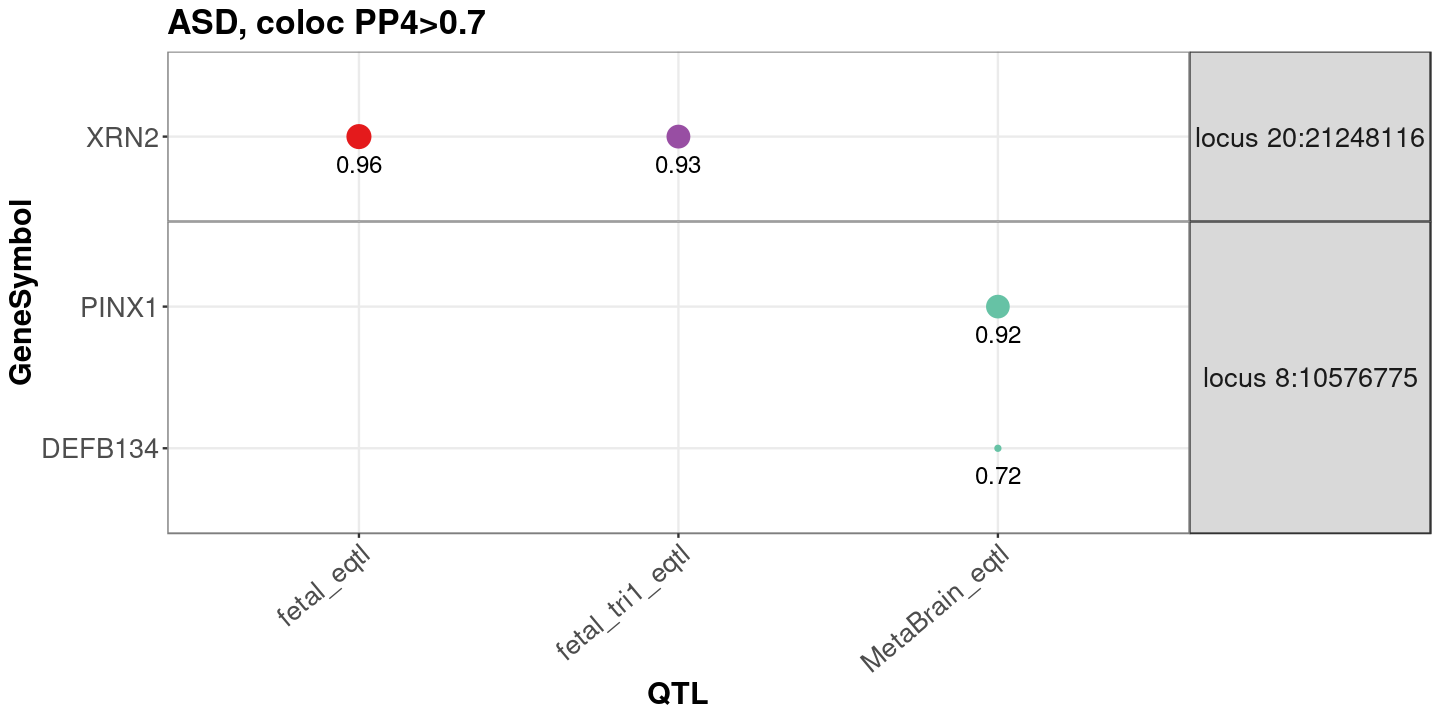

In [95]:
options(repr.plot.height = 6, repr.plot.width = 12)

ggplot(res_plot, aes(x = QTL, y = GeneSymbol)) +
    geom_point(aes(size = PP4, color = QTL)) +
    geom_text(aes(label = round(PP4, 2)), size = 5, vjust = 2) +
    facet_grid(loc ~ ., scales = "free", space = "free") +
    theme_bw() +
    ggtitle("ASD, coloc PP4>0.7") +
    theme(axis.text = element_text(size = 16),
          axis.text.x = element_text(angle = 40, hjust = 1),
          axis.title = element_text(size = 18, face = "bold"),
          plot.title = element_text(size = 20, face = "bold"),
          legend.position = "none",
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_color_manual(values = my_palette)

In [96]:
ggsave("../figures/coloc_asd.pdf", height = 6, width = 12)

### ADHD

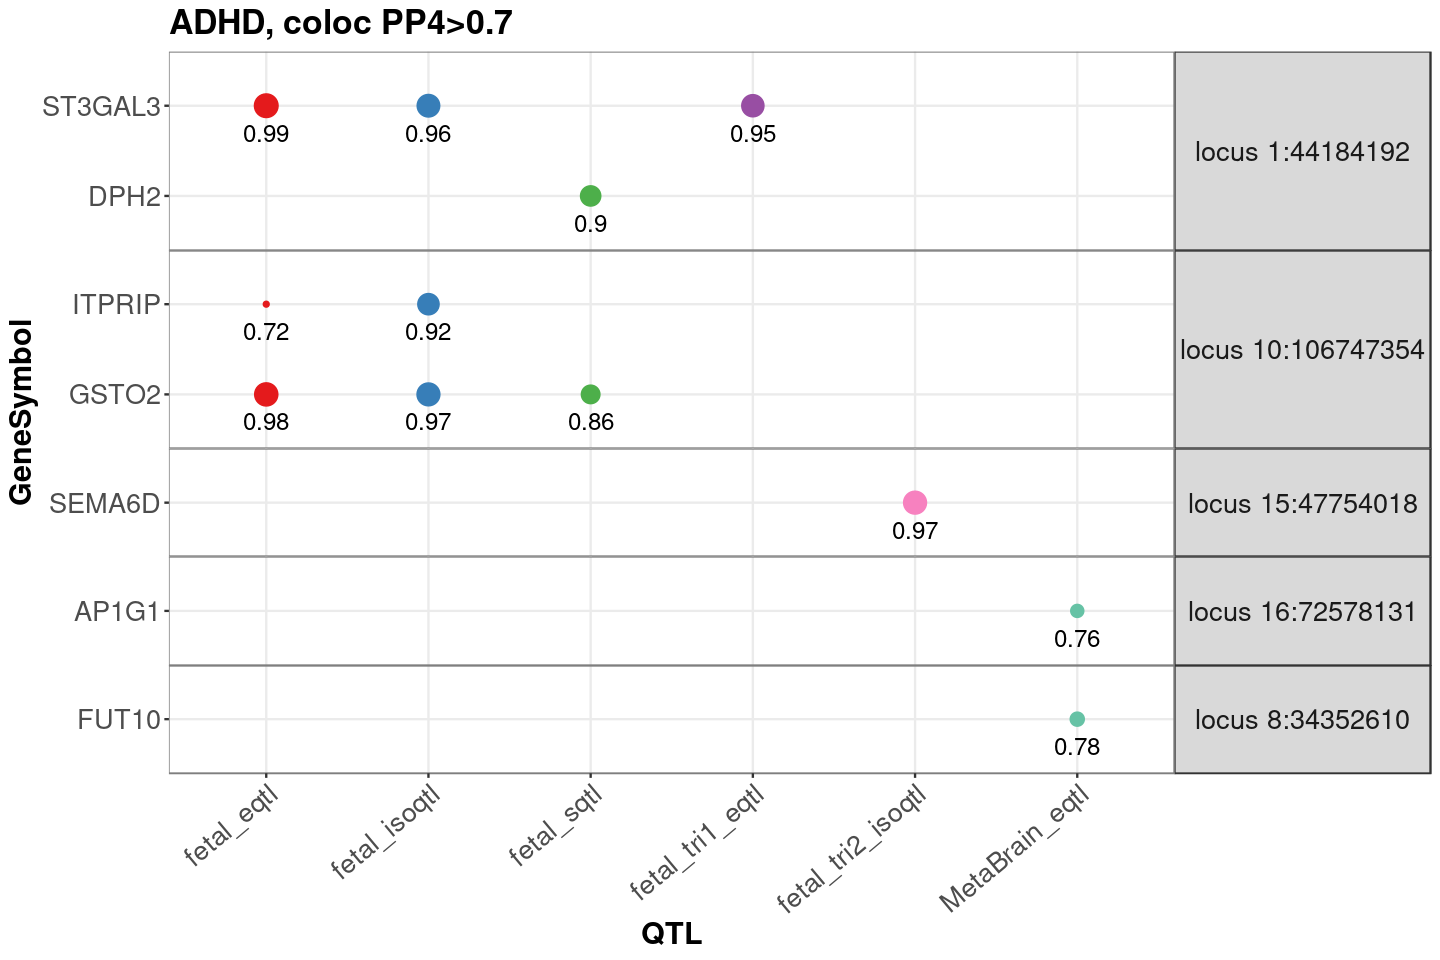

In [98]:
res <- read.table("../out/ADHD.Demontis.2019/coloc_sigPP4_annot.txt", header = T)
res_plot <- res %>% 
    filter(GeneType == "protein_coding") %>% 
    arrange(loc, GeneSymbol, QTL, -PP4)
res_plot$loc <- paste0("locus ", res_plot$CHR, ":", res_plot$BP)
remove <- which(duplicated(res_plot[c("loc", "GeneSymbol", "QTL")]))
res_plot <- res_plot[-remove,]
options(repr.plot.height = 8, repr.plot.width = 12)

ggplot(res_plot, aes(x = QTL, y = GeneSymbol)) +
    geom_point(aes(size = PP4, color = QTL)) +
    geom_text(aes(label = round(PP4, 2)), size = 5, vjust = 2) +
    facet_grid(loc ~ ., scales = "free", space = "free") +
    theme_bw() +
    ggtitle("ADHD, coloc PP4>0.7") +
    theme(axis.text = element_text(size = 16),
          axis.text.x = element_text(angle = 40, hjust = 1),
          axis.title = element_text(size = 18, face = "bold"),
          plot.title = element_text(size = 20, face = "bold"),
          legend.position = "none",
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_color_manual(values = my_palette)

In [99]:
ggsave("../figures/coloc_adhd.pdf", height = 8, width = 12)